In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# text mining

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/품질공학/학기 프로젝트/품공데이터.csv')

In [ ]:
!pip install konlpy

In [ ]:
for i in df['열1']:
  print(i)

닷투라인은 흩어져있고 어렴풋이 알고있던 국어 배경지식의 기준과 틀을 잡아줘 지문이 더 매끄럽게 읽히게 해주는 강좌입니다. 법과 경제에 대한 전반적인 지식이 부족했던 저도 라인강좌에서 배운 법, 경제지문의 틀을 적용해서 공부를 하니 독서 문제를 풀면서 이전보다 ”엥?“ 하는 횟수 보다 ”아!“하는 횟수가 점점 더 많아지는 것을 느껴 “라인 잘 선택했구나!” 하는 생각이 들었습니다. 배경지식 뿐만 아니라 글을 읽는 방법도 가르쳐주셔서 ”질 좋은 독해“를 하게된 것 같습니다.
첫 강의부터 듣고 많은것을 깨달았어요. 그동안 어떠한 약점이 있는 줄 알지 못 한 체 무식하게 공부를 해 왔는지 뼈저리게 느꼈고, 몇 강을 더 들어보니 어떤 부분을 중심으로 공부해야
제 점수가 바뀔지 알게 됐어요. 그동안 들었던 강의도 물론 매우 좋은 강의였지만 다 합쳐도 '유대종의 미' 라는 강좌를 넘어서지 못 할 거 같아요 ㅋㅋㅋㅋ
문학부터 바로 잡아주셔서 부족했던 문학 실력이 한번에 확 잡힌듯한 느낌이고, 실제로 유미 주간지를 풀면서 체감을 많이 했어요.
독서도, 언매도 아직 많은 약점이 있다는걸 인지했고, 앞으로 나올 유미 강의를 듣고 학습하면서 나아가면 57일동안 많은 것이 바뀔 거 같아요.
남은 시간 동안 부족한 부분 위주로 채워나가며 어마무시한 성적 상승으로 수능 날 만족할만한 국어 점수를 받고 당당히 유대종 선생님 얼굴 뵙겠습니다!
작년에 만족스럽지 못한 결과를 얻고 올해 수능을 다시 도전하게 되었고 선생님의 커리를 인셉션부터 계속 따라갔습니다.그러면서 학원에서 응시하는 7월 8월 모의고사에서 97 100점을 받으며 이제 국어는 잘한다고 생각하며 방심하였고 국어를 소홀하게 공부하였습니다.그 결과 9월에서 처참한 성적이 나왔고 다시 국어 공부를 열심히 하여야겠다 생각하며 선생님의 유대종의 미를 수강하였는데 선생님께서는 제가 실수하는 부분만 콕콕 골라서 "너는 여기서 이렇게 해서 틀렸을거야"하시며 제가 잘못하고 있던 부분을 잡으시고 고칠 수 있도록 태도 교정을 도와주셨습니다. 또한 

In [ ]:
from konlpy.tag import Okt
from collections import Counter

def tokenize_korean(text):
    # 형태소 분석기 초기화
    okt = Okt()

    # 형태소 분석
    tokens = okt.morphs(text)

    return tokens

# 예시 사용

tokens = []

for i in df['열1']:
  input_text = i
  result = tokenize_korean(input_text)
  tokens.append(result)

# tokens_list에는 각 문장의 토큰 리스트가 들어가 있습니다.

# 토큰 빈도를 세기 위해 Counter 사용
token_counts = Counter([token for tokens in tokens for token in tokens])

# 결과 출력
print(token_counts)

In [ ]:
token_df = pd.DataFrame(list(token_counts.items()), columns=['토큰', '빈도'])
token_df

,토큰,빈도
0,닷,2
1,투라,1
2,인,149
3,은,367
4,흩어져있고,1
...,...,...
8236,스펙트럼,1
8237,하고싶습니다,1
8238,쓰니,1
8239,씀,1


In [ ]:
sorted_token_df = token_df.sort_values(by='빈도', ascending=False)
sorted_token_df

,토큰,빈도
24,.,1535
17,이,1431
14,을,1214
44,를,914
27,에,788
...,...,...
4358,안되면서,1
4357,만들어짐,1
4356,봉합,1
4355,깨지고,1


In [ ]:
stopwords = pd.read_csv('/content/drive/MyDrive/품질공학/학기 프로젝트/불용어 사전.csv')

In [ ]:
stopwords

,열1
0,가
1,가까스로
2,가령
3,각
4,각각
...,...
590,휘익
591,휴
592,흐흐
593,흥


In [ ]:
sorted_token_df = sorted_token_df[~sorted_token_df['토큰'].isin(stopwords['열1'])]
sorted_token_df

,토큰,빈도
24,.,1535
38,",",746
84,강의,608
47,문제,555
33,도,480
...,...,...
4358,안되면서,1
4357,만들어짐,1
4356,봉합,1
4355,깨지고,1


In [ ]:
sorted_token_df.to_csv('sorted_token_df.csv', index=False)

# 목소리 높낮이

In [ ]:
!pip install pydub
!pip install aubio

In [ ]:
import os
import numpy as np
from pydub import AudioSegment
import aubio

def measure_pitch(file_path):
    audio = AudioSegment.from_file(file_path)
    samples = np.array(audio.get_array_of_samples(), dtype=np.float32)

    # Set up pitch detection
    samplerate = audio.frame_rate
    win_s = 4096  # window size
    hop_s = 512   # hop size

    pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate)
    pitch_o.set_unit("Hz")
    pitch_o.set_tolerance(0.8)

    pitches = []
    for i in range(0, len(samples) - hop_s, hop_s):  # Adjust loop range
        pitch = pitch_o(samples[i:i+hop_s])[0]
        confidence = pitch_o.get_confidence()
        if confidence > 0.8:  # Consider only confident pitch values
            pitches.append(pitch)

    # Calculate average pitch
    if pitches:
        average_pitch = sum(pitches) / len(pitches)
        return average_pitch
    else:
        return None

def average_pitch_in_directory(directory_path):
    mp3_files = [f for f in os.listdir(directory_path) if f.endswith('.mp3')]
    if not mp3_files:
        print("No .mp3 files found in the directory.")
        return None

    average_pitches = []
    for mp3_file in mp3_files:
        file_path = os.path.join(directory_path, mp3_file)
        pitch = measure_pitch(file_path)
        if pitch is not None:
            print(f"File: {mp3_file}, Average Pitch: {pitch:.2f} Hz")
            average_pitches.append(pitch)

    overall_average_pitch = np.mean(average_pitches)
    print(f"\nOverall Average Pitch: {overall_average_pitch:.2f} Hz")

# 음원 파일 경로
mp3_directory_path = '/content/drive/MyDrive/품질공학/학기 프로젝트/품공/mp3'

# 평균 목소리 높낮이 측정
average_pitch_in_directory(mp3_directory_path)


File: 정승익 (mp3cut.net).mp3, Average Pitch: 101.40 Hz
File: 윤혜정 (mp3cut.net).mp3, Average Pitch: 147.85 Hz
File: 레이나 (mp3cut.net).mp3, Average Pitch: 177.72 Hz
File: 남궁민 (mp3cut.net).mp3, Average Pitch: 88.23 Hz
File: 박자영 (mp3cut.net).mp3, Average Pitch: 136.46 Hz
File: 장동준 (mp3cut.net).mp3, Average Pitch: 167.29 Hz
File: 정유빈 (mp3cut.net).mp3, Average Pitch: 192.13 Hz
File: 주혜연 (mp3cut.net).mp3, Average Pitch: 169.08 Hz
File: 정승제 (mp3cut.net).mp3, Average Pitch: 95.63 Hz

Overall Average Pitch: 141.75 Hz


In [ ]:
def min_max_scaling(value, min_val, max_val, new_min, new_max):
    scaled_value = (value - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    return scaled_value

# 주어진 데이터: 파일명과 평균 피치
data = [
    ("정승익", 101.40),
    ("윤혜정", 147.85),
    ("레이나", 177.72),
    ("남궁민", 88.23),
    ("박자영", 136.46),
    ("장동준", 167.29),
    ("정유빈", 192.13),
    ("주혜연", 169.08),
    ("정승제", 95.63),
]

# 주파수의 최솟값과 최댓값 구하기
min_pitch = min(data, key=lambda x: x[1])[1]
max_pitch = max(data, key=lambda x: x[1])[1]

# Min-Max Scaling을 사용하여 주파수 스케일링
scaled_data = [(name, min_max_scaling(pitch, min_pitch, max_pitch, 1, 5)) for name, pitch in data]

# 결과 출력
for name, scaled_pitch in scaled_data:
    print(f"{name}: {scaled_pitch:.2f}")


정승익: 1.51
윤혜정: 3.30
레이나: 4.45
남궁민: 1.00
박자영: 2.86
장동준: 4.04
정유빈: 5.00
주혜연: 4.11
정승제: 1.28


#친밀도&판서량


In [ ]:
def min_max_scaling(values):
    min_val = min(values)
    max_val = max(values)

    scaled_values = [(x - min_val) / (max_val - min_val) * 4 + 1 for x in values]

    return scaled_values

# 친밀도 데이터
friendship_korean = [20436, 1359, 1355]
friendship_math = [23755, 5447, 4357]
friendship_english = [13186, 6437, 859]

# 판서량 데이터
handwriting_korean = [0.064369, 0.041586, 0.036002]
handwriting_math = [0.046275, 0.081745, 0.03905]
handwriting_english = [0.060918, 0.086389, 0.140076]

# 각각의 데이터 스케일링
scaled_friendship_korean = min_max_scaling(friendship_korean)
scaled_friendship_math = min_max_scaling(friendship_math)
scaled_friendship_english = min_max_scaling(friendship_english)

scaled_handwriting_korean = min_max_scaling(handwriting_korean)
scaled_handwriting_math = min_max_scaling(handwriting_math)
scaled_handwriting_english = min_max_scaling(handwriting_english)

# 결과 출력
print("<친밀도 스케일링 결과>")
print("국어:", scaled_friendship_korean)
print("수학:", scaled_friendship_math)
print("영어:", scaled_friendship_english)

print("\n<판서량 스케일링 결과>")
print("국어:", scaled_handwriting_korean)
print("수학:", scaled_handwriting_math)
print("영어:", scaled_handwriting_english)


<친밀도 스케일링 결과>
국어: [5.0, 1.000838530475342, 1.0]
수학: [5.0, 1.2247654397360552, 1.0]
영어: [5.0, 2.8100105459560316, 1.0]

<판서량 스케일링 결과>
국어: [5.0, 1.787393802658018, 1.0]
수학: [1.6768942499121673, 5.0, 1.0]
영어: [1.0, 2.287096692690568, 5.0]


# 난이도 분석

- https://koreascience.kr/article/JAKO201907752705943.page
- https://patents.google.com/patent/KR20070105090A/ko

In [ ]:
!pip install konlpy

In [ ]:
import os

directory_path = '/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막'  # 디렉토리 경로를 올바르게 수정해주세요

# 디렉토리 내의 모든 txt 파일을 읽어서 문자열로 합치기
combined_text = ''
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):  # txt 파일인지 확인
        file_path = os.path.join(directory_path, filename)  # 파일 경로 생성

        # 파일 열기
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        combined_text += text  # 파일의 내용을 문자열에 추가

print(combined_text)  # 디렉토리 내의 모든 txt 파일을 합친 문자열을 출력

[음악]

여러분

안녕하세요

EBS 국어 영역의 윤혜정입니다

얘들아 오늘 안녕하니 자 오늘 진짜

많이 힘들어질 거예요 자 9월 모평은

6월 모평과 또 다릅니다 우리 수능

직전에 마지막 평가원의 시험이기

때문에 하루종일 어마어마하게 긴장을

했을 거라는 생각이 듭니다 선생님도

오늘 아침부터 일어나서 지금 생방송만

세 개째야 자 그렇지만 선생님 하나도

힘들지 않아이 시간에 30분이라는

시간이 주어졌는데이 30분 동안에

여러분에게 꼭 전달해야 할 것을

얘기해 주고 싶습니다 너희도 집중해서

조금은 피곤하지만이 9월 모평 좀

많이 힘들었을 거고 좀 쉽지

않을까라고 생각하고 봤는데 이게

쉽지만은 않네 이런 생각 때문에 시간

관리도 잘 안 됐을 수도 있고

당황했을 수도 있습니다 하지만 이건

모의 평가야 얘들아이 시간에 우리

진짜

정말 알찬 정보를 잘 얻어서 이것들을

가지고 우리

앞으로 이어질 71 잘 보낼 수

있으면 좋겠습니다 자 그러면 이제

1교시 그 긴장되는 시간 우리

국어 영역에

특징부터 한번 얘기를 해보도록

하겠습니다 선생님도 아침에 이런

생각했어요

그래도 좀

쉽지 않을까라는 생각을 했는데요

문제를 너희처럼 정말 실전처럼

수험생처럼 풀어봤거든요

풀면서 아 이거

쉽지만 않다

딱 보면은

와 정부랑 진짜 많다

와 어려워 보인다 이런 지문들은 많이

보이지 않았어

마음이 좀 편해졌어 이렇게 쭉 훑어볼

때

그러나

막상 문제들을 풀어보니까 이거 뭐지

5개가 다 적절한 거 같은데 어 이거

뭐야

적절하지 않은게 왜 두 개야 이렇게

마지막에 정답 하나 골라내기가 조금

어려웠던 그런 문항들이 여기저기에

배치가 돼 있었어요 그럼 우리

학생들은 너희들은 당황하잖아 그치

당황하면서 시간이 지체되면서 시간

관리가 안 되고

멘탈이 무너져 버리면은

점수 않는 거예요 그 연습까지 오늘

여러분 했어야 됩니다

특히 올해 9월 5평은요이

경향이 기조 이게 수능의 반영되지

않을 수가 없어요 그래서 더

In [ ]:
from collections import Counter
import pandas as pd
from konlpy.tag import Okt

def measure_difficulty(text):
    # Okt 토크나이저 초기화
    okt = Okt()

    # 텍스트를 토큰화
    tokens = okt.nouns(text)

    # 토큰 빈도 측정
    token_freq = Counter(tokens)

    # 빈도에 따른 난이도 측정
    max_freq = max(token_freq.values())
    min_freq = min(token_freq.values())
    freq_diff = max_freq - min_freq

    # 난이도 측정 기준 설정
    difficulty_levels = {}
    for token, freq in token_freq.items():
        difficulty = round(5 - 4 * (freq - min_freq) / freq_diff) if freq_diff != 0 else 3
        difficulty_levels[token] = difficulty

    # 데이터프레임 생성
    df = pd.DataFrame(difficulty_levels.items(), columns=['Token', 'Difficulty'])
    df['Frequency'] = df['Token'].apply(lambda x: token_freq[x])
    return df

# 텍스트의 난이도 측정
result_df = measure_difficulty(combined_text)
result_df

,Token,Difficulty,Frequency
0,음악,5,105
1,여러분,4,768
2,국어,5,29
3,영역,5,34
4,윤혜정,5,1
...,...,...,...
8351,볼때,5,1
8352,웅비,5,1
8353,캇,5,1
8354,반생,5,1


In [ ]:
result_df[result_df['Difficulty']==1]

,Token,Difficulty,Frequency
9,거,1,2367
59,그,1,2089


In [ ]:
result_df[result_df['Difficulty']==3]

,Token,Difficulty,Frequency
12,우리,3,1195
56,수,3,1364
62,문제,3,1459
75,뭐,3,1410
150,여기,3,922
312,번,3,1398


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/국어_남궁민.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.491417782354961


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/국어_윤혜정.txt', 'r', encoding='utf-8') as file:
   jsi = file.read()

tokens = okt.nouns(jsi)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.443223443223443


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/국어_장동준.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.555555555555555


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/수학_박자영.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.409469619995936


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/수학_정승제.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.494471319972357


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/수학_정유빈.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.250267094017094


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/영어_레이나.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.330498866213152


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/영어_정승익.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.2774786899955135


In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 토크나이저 초기화
okt = Okt()

with open('/content/drive/MyDrive/품질공학/학기 프로젝트/품공/자막/영어_주혜연.txt', 'r', encoding='utf-8') as file:
   lhy = file.read()

tokens = okt.nouns(lhy)  # 명사만 추출하는 예시이니 다른 토크나이징 방법으로 변경 가능합니다.

# 'result_df' 데이터프레임 활용하여 토큰의 난이도 찾아내기
token_difficulty = []
for token in tokens:
    token_data = result_df[result_df['Token'] == token]
    if not token_data.empty:
        difficulty = token_data.iloc[0]['Difficulty']
        token_difficulty.append(difficulty)

# 토큰들의 평균 난이도 계산
if token_difficulty:
    average_difficulty = sum(token_difficulty) / len(token_difficulty)
    print(f"평균 난이도: {average_difficulty}")
else:
    print("토큰의 난이도를 찾을 수 없습니다.")

평균 난이도: 4.3008393742846245


# 추천 시스템

In [1]:
import pandas as pd

In [5]:
tp = pd.read_csv('/content/drive/MyDrive/품질공학/학기 프로젝트/teacher_preference.csv')

In [ ]:
tp_1 = tp[['5. 어떤 단어를 사용해 설명해주시는 선생님이 좋은가요?', '6. 얼마 정도의 친밀감이 느껴지는 선생님이 좋은가요?',
           '7. 강의에서 적절한 배경음이나 효과음이 사용되는게 좋은가요?', '8. 판서량이 어떤 선생님이 좋은가요?',
           '9. 목소리 높이가 어떤 선생님이 좋은가요?', '10. 억양 변화량이 어떤 선생님이 좋은가요?',
           '11. 인터넷 강의에 자막이 포함되는 것이 좋다고 생각하나요?', '12. 보조자료를 얼마나 많이 주는 선생님이 좋은가요?']]

In [ ]:
tp_1.columns = [['text','friendliness','sound_effect','writing','pitch','accent','subtitle','homework']]

In [ ]:
tp_1

,text,friendliness,sound_effect,writing,pitch,accent,subtitle,homework
0,5,5,1,5,5,3,3,5
1,1,4,2,3,4,4,2,3
2,3,3,3,4,4,4,5,3
3,2,4,4,3,3,5,2,4
4,2,3,4,4,3,3,5,2
5,3,2,1,2,3,1,4,2
6,3,5,4,4,2,3,5,4
7,3,3,5,3,4,4,3,4
8,5,5,1,5,1,5,5,5
9,1,5,1,4,4,5,5,5


In [ ]:
tp2 = tp_1[['text','friendliness','writing','pitch']]

In [ ]:
tp2

,text,friendliness,writing,pitch
0,5,5,5,5
1,1,4,3,4
2,3,3,4,4
3,2,4,3,3
4,2,3,4,3
5,3,2,2,3
6,3,5,4,2
7,3,3,3,4
8,5,5,5,1
9,1,5,4,4


In [ ]:
tp2.iloc[:,0] *= 0.285319808
tp2.iloc[:,1] *= 0.125145442
tp2.iloc[:,2] *= 0.13797709
tp2.iloc[:,3] *= 0.08707658

# 결과 출력
tp2

<ipython-input-11-004a145fc3d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp2.iloc[:,0] *= 0.285319808
<ipython-input-11-004a145fc3d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp2.iloc[:,1] *= 0.125145442
<ipython-input-11-004a145fc3d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,text,friendliness,writing,pitch
0,1.426599,0.625727,0.689885,0.435383
1,0.285320,0.500582,0.413931,0.348306
2,0.855959,0.375436,0.551908,0.348306
3,0.570640,0.500582,0.413931,0.261230
4,0.570640,0.375436,0.551908,0.261230
5,0.855959,0.250291,0.275954,0.261230
6,0.855959,0.625727,0.551908,0.174153
7,0.855959,0.375436,0.413931,0.348306
8,1.426599,0.625727,0.689885,0.087077
9,0.285320,0.625727,0.551908,0.348306


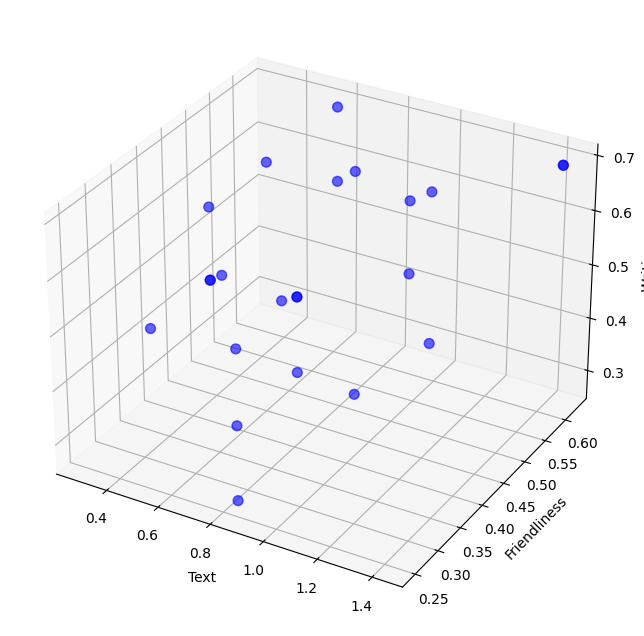

In [ ]:
import matplotlib.pyplot as plt

# 3차원 그래프 그리기
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 열을 x, y, z로 설정하여 그래프에 표현
ax.scatter(tp2['text'], tp2['friendliness'], tp2['writing'], s=50, c='blue', marker='o', alpha=0.6)

# 축 이름 설정
ax.set_xlabel('Text')
ax.set_ylabel('Friendliness')
ax.set_zlabel('Writing')

# 그래프 출력
plt.show()

In [ ]:
teacher = pd.read_csv('/content/drive/MyDrive/품질공학/학기 프로젝트/품공 최종 표.csv', index_col = 0)

In [ ]:
teacher = teacher.iloc[0:9]
teacher

,선생님 이름,단어 난이도,친밀도,판서량,높낮이,과목
0.0,윤혜정,4.443223,5.000000,5.000000,3.30,국어
1.0,남궁민,4.491418,1.000839,1.787394,1.00,국어
2.0,장동준,4.555556,1.000000,1.000000,4.04,국어
3.0,정승제,4.494471,5.000000,1.676894,1.28,수학
4.0,박자영,4.409470,1.224765,5.000000,2.86,수학
5.0,정유빈,4.250267,1.000000,1.000000,5.00,수학
6.0,주혜연,4.300839,5.000000,1.000000,4.11,영어
7.0,정승익,4.277479,2.810011,2.287097,1.51,영어
8.0,레이나,4.330499,1.000000,5.000000,4.35,영어


In [ ]:
teacher.iloc[:,1] *= 0.285319808
teacher.iloc[:,2] *= 0.125145442
teacher.iloc[:,3] *= 0.13797709
teacher.iloc[:,4] *= 0.08707658

# 결과 출력
teacher

,선생님 이름,단어 난이도,친밀도,판서량,높낮이,과목
0.0,윤혜정,1.267740,0.625727,0.689885,0.287353,국어
1.0,남궁민,1.281490,0.125250,0.246619,0.087077,국어
2.0,장동준,1.299790,0.125145,0.137977,0.351789,국어
3.0,정승제,1.282362,0.625727,0.231373,0.111458,수학
4.0,박자영,1.258109,0.153274,0.689885,0.249039,수학
5.0,정유빈,1.212685,0.125145,0.137977,0.435383,수학
6.0,주혜연,1.227115,0.625727,0.137977,0.357885,영어
7.0,정승익,1.220449,0.351660,0.315567,0.131486,영어
8.0,레이나,1.235577,0.125145,0.689885,0.378783,영어


In [ ]:
teacher.columns = [['name','text','friendliness','writing','pitch','subject']]

In [ ]:
teacher

,name,text,friendliness,writing,pitch,subject
0.0,윤혜정,1.267740,0.625727,0.689885,0.287353,국어
1.0,남궁민,1.281490,0.125250,0.246619,0.087077,국어
2.0,장동준,1.299790,0.125145,0.137977,0.351789,국어
3.0,정승제,1.282362,0.625727,0.231373,0.111458,수학
4.0,박자영,1.258109,0.153274,0.689885,0.249039,수학
5.0,정유빈,1.212685,0.125145,0.137977,0.435383,수학
6.0,주혜연,1.227115,0.625727,0.137977,0.357885,영어
7.0,정승익,1.220449,0.351660,0.315567,0.131486,영어
8.0,레이나,1.235577,0.125145,0.689885,0.378783,영어


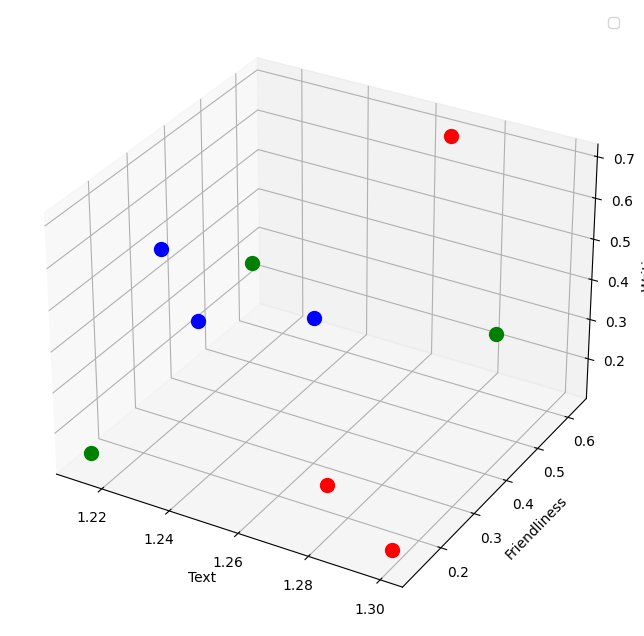

In [ ]:
# 3차원 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 과목별로 데이터 포인트 그리기
colors = {'국어': 'red', '수학': 'green', '영어': 'blue'}
for index, row in teacher.iterrows():
    ax.scatter(row['text'], row['friendliness'], row['writing'], c=colors[row['subject']], marker='o', s=100)

# 축 레이블 설정
ax.set_xlabel('Text')
ax.set_ylabel('Friendliness')
ax.set_zlabel('Writing')

ax.legend()

# 그래프 보여주기
plt.show()

In [ ]:
student = tp2

In [ ]:
student

,text,friendliness,writing,pitch
0,1.426599,0.625727,0.689885,0.435383
1,0.285320,0.500582,0.413931,0.348306
2,0.855959,0.375436,0.551908,0.348306
3,0.570640,0.500582,0.413931,0.261230
4,0.570640,0.375436,0.551908,0.261230
5,0.855959,0.250291,0.275954,0.261230
6,0.855959,0.625727,0.551908,0.174153
7,0.855959,0.375436,0.413931,0.348306
8,1.426599,0.625727,0.689885,0.087077
9,0.285320,0.625727,0.551908,0.348306


In [ ]:
data = {
    'name': ['윤혜정', '남궁민', '장동준', '정승제', '박자영', '정유빈', '주혜연', '정승익', '레이나'],
    'text': [1.267740, 1.281490, 1.299790, 1.282362, 1.258109, 1.212685, 1.227115, 1.220449, 1.235577],
    'friendliness': [0.625727, 0.125250, 0.125145, 0.625727, 0.153274, 0.125145, 0.625727, 0.351660, 0.125145],
    'writing': [0.689885, 0.246619, 0.137977, 0.231373, 0.689885, 0.137977, 0.137977, 0.315567, 0.689885],
    'pitch': [0.287353, 0.087077, 0.351789, 0.111458, 0.249039, 0.435383, 0.357885, 0.131486, 0.378783],
    'subject': ['국어', '국어', '국어', '수학', '수학', '수학', '영어', '영어', '영어']
}

teacher = pd.DataFrame(data)

In [ ]:
teacher

,name,text,friendliness,writing,pitch,subject
0,윤혜정,1.267740,0.625727,0.689885,0.287353,국어
1,남궁민,1.281490,0.125250,0.246619,0.087077,국어
2,장동준,1.299790,0.125145,0.137977,0.351789,국어
3,정승제,1.282362,0.625727,0.231373,0.111458,수학
4,박자영,1.258109,0.153274,0.689885,0.249039,수학
5,정유빈,1.212685,0.125145,0.137977,0.435383,수학
6,주혜연,1.227115,0.625727,0.137977,0.357885,영어
7,정승익,1.220449,0.351660,0.315567,0.131486,영어
8,레이나,1.235577,0.125145,0.689885,0.378783,영어


In [ ]:
korean_teachers = teacher[teacher['subject'] == '국어']
math_teachers = teacher[teacher['subject'] == '수학']
english_teachers = teacher[teacher['subject'] == '영어']

In [11]:
h2 = tp[tp['2. 몇 학년이신가요?']=='고2'].index
h2

Int64Index([4, 6, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64')

In [13]:
g1_2 = tp[tp['3. 본인의 내신성적은 어느 정도인가요?']=='1~2등급'].index
g1_2

Int64Index([3, 4, 5, 8, 19, 22], dtype='int64')

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

student_id = 22
specific_point = np.array(student.loc[student_id])
specific_point = specific_point.reshape(1, -1)

#국어 선생님 추천
kor = np.array(korean_teachers.iloc[:,1:5])
distances_to_kor_teacher = cdist(specific_point, kor)
nearest_kor_teacher = korean_teachers.iloc[np.argmin(distances_to_kor_teacher)]['name']

#수학 선생님 추천
math = np.array(math_teachers.iloc[:,1:5])
distances_to_math_teacher = cdist(specific_point, math)
nearest_math_teacher = math_teachers.iloc[np.argmin(distances_to_math_teacher)]['name']

#영어 선생님 추천
eng = np.array(english_teachers.iloc[:,1:5])
distances_to_eng_teacher = cdist(specific_point, eng)
nearest_eng_teacher = english_teachers.iloc[np.argmin(distances_to_eng_teacher)]['name']

print(f"학생 ID: {student_id}")
print(f"국어 추천 선생님: {nearest_kor_teacher}")
print(f"수학 추천 선생님: {nearest_math_teacher}")
print(f"영어 추천 선생님: {nearest_eng_teacher}")

학생 ID: 22
국어 추천 선생님: 남궁민
수학 추천 선생님: 정승제
영어 추천 선생님: 정승익
